<a href="https://colab.research.google.com/github/Bosy-Ayman/Comparative-Analysis-ML/blob/main/Machine_Learning_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

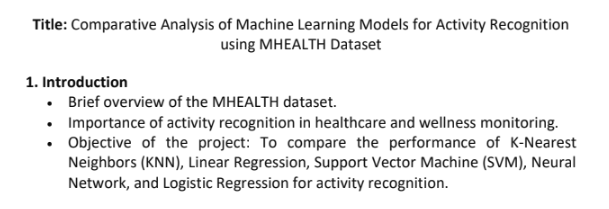

Kaggle:https://www.kaggle.com/datasets/gaurav2022/mobile-health/data

Attribute Information:

alx: acceleration from the left-ankle sensor (X axis)

aly: acceleration from the left-ankle sensor (Y axis)

alz: acceleration from the left-ankle sensor (Z axis)

glx: gyro from the left-ankle sensor (X axis)

gly: gyro from the left-ankle sensor (Y axis)

glz: gyro from the left-ankle sensor (Z axis)

arx: acceleration from the right-lower-arm sensor (X axis)

ary: acceleration from the right-lower-arm sensor (Y axis)

arz: acceleration from the right-lower-arm sensor (Z axis)

grx: gyro from the right-lower-arm sensor (X axis)

gry: gyro from the right-lower-arm sensor (Y axis)

grz: gyro from the right-lower-arm sensor (Z axis)

subject: volunteer number

Activity: corresponding activity

In [55]:
import pandas as pd
import numpy as np
import pandas as pd

from collections import Counter

from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pylab as plt
import seaborn as sns
from  sklearn import datasets
from collections import Counter
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import Normalizer

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, f1_score,confusion_matrix, mean_absolute_error , r2_score , mean_squared_error, mean_absolute_percentage_error

In [57]:
import numpy as np
import pandas as pd
import itertools

from sklearn import datasets
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from mlxtend.plotting import plot_decision_regions
from mlxtend.preprocessing import shuffle_arrays_unison
import seaborn as sns

from tqdm.notebook import tqdm_notebook as tqdm

from sklearn.svm import SVC

from sklearn.metrics import accuracy_score

In [58]:
!pip install -U scikit-learn

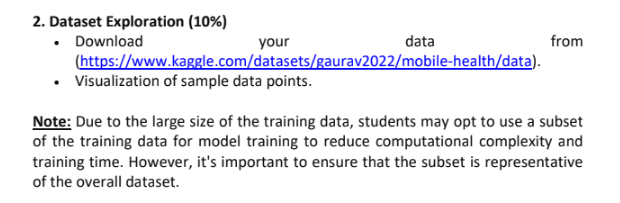

#Import Data

In [67]:
df = pd.read_csv('/content/mhealth_raw_data.csv',nrows=100000)


In [68]:
df.head(10)

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity,subject
0,2.1849,-9.6967,0.63077,0.103900,-0.84053,-0.68762,-8.6499,-4.5781,0.187760,-0.44902,-1.0103,0.034483,0,subject1
1,2.3876,-9.5080,0.68389,0.085343,-0.83865,-0.68369,-8.6275,-4.3198,0.023595,-0.44902,-1.0103,0.034483,0,subject1
2,2.4086,-9.5674,0.68113,0.085343,-0.83865,-0.68369,-8.5055,-4.2772,0.275720,-0.44902,-1.0103,0.034483,0,subject1
3,2.1814,-9.4301,0.55031,0.085343,-0.83865,-0.68369,-8.6279,-4.3163,0.367520,-0.45686,-1.0082,0.025862,0,subject1
4,2.4173,-9.3889,0.71098,0.085343,-0.83865,-0.68369,-8.7008,-4.1459,0.407290,-0.45686,-1.0082,0.025862,0,subject1
5,2.2639,-9.4493,0.61267,0.098330,-0.84240,-0.68959,-8.7247,-4.0449,0.506090,-0.45686,-1.0082,0.025862,0,subject1
6,2.1740,-9.6574,0.60137,0.098330,-0.84240,-0.68959,-9.0864,-4.1474,0.261380,-0.42745,-1.0164,0.019397,0,subject1
7,2.2023,-9.4397,0.58129,0.098330,-0.84240,-0.68959,-9.0143,-4.0052,0.476820,-0.42745,-1.0164,0.019397,0,subject1
8,2.2037,-9.6283,0.54062,0.076067,-0.83114,-0.69155,-9.0469,-4.0475,0.245540,-0.42745,-1.0164,0.019397,0,subject1
9,2.2135,-9.6887,0.43353,0.076067,-0.83114,-0.69155,-8.8318,-4.1090,0.096632,-0.42745,-1.0164,0.019397,0,subject1


#Explore Data

*if we used the full data it would need to be cleaned*

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   alx       100000 non-null  float64
 1   aly       100000 non-null  float64
 2   alz       100000 non-null  float64
 3   glx       100000 non-null  float64
 4   gly       100000 non-null  float64
 5   glz       100000 non-null  float64
 6   arx       100000 non-null  float64
 7   ary       100000 non-null  float64
 8   arz       100000 non-null  float64
 9   grx       100000 non-null  float64
 10  gry       100000 non-null  float64
 11  grz       100000 non-null  float64
 12  Activity  100000 non-null  int64  
 13  subject   100000 non-null  object 
dtypes: float64(12), int64(1), object(1)
memory usage: 10.7+ MB


In [62]:
missing_values_count = df.isnull().sum()

missing_values_count[:]

alx         0
aly         0
alz         0
glx         0
gly         0
glz         0
arx         0
ary         0
arz         0
grx         0
gry         0
grz         0
Activity    0
subject     0
dtype: int64

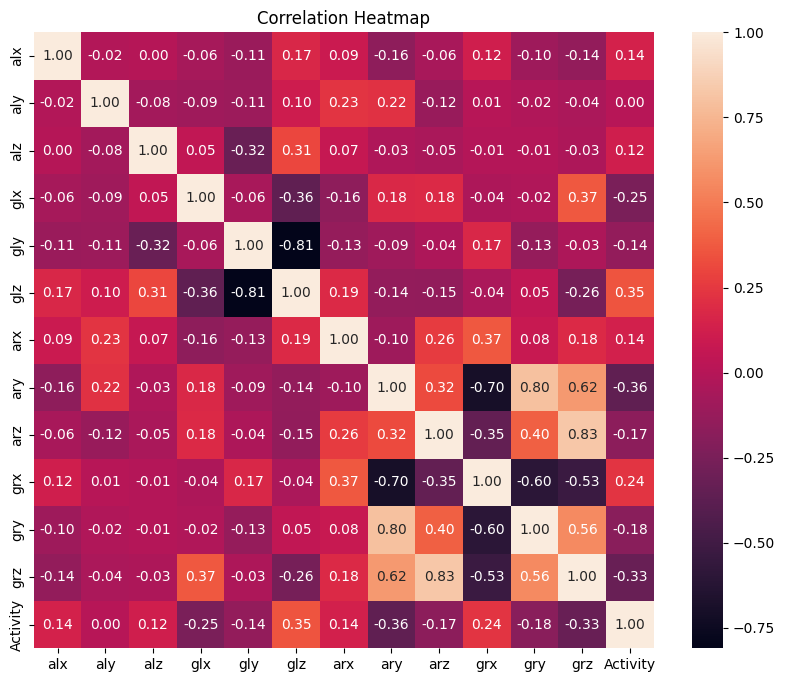

In [66]:
numeric_df = df.select_dtypes(include='number')

corr_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


# Clean Data



In [ ]:
df.dropna(inplace = True)

In [ ]:
df.isnull().sum()

alx         0
aly         0
alz         0
glx         0
gly         0
glz         0
arx         0
ary         0
arz         0
grx         0
gry         0
grz         0
Activity    0
subject     0
dtype: int64

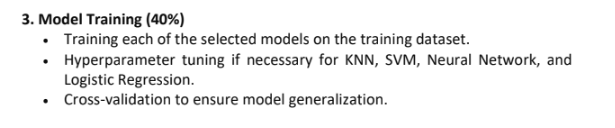

# **Split the data into test & train**

In [ ]:
X = df.drop(['subject','Activity'], axis=1).values  #Input
y = df['Activity'].values #target

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# **Training the dataset & Hyperparameter tuning**

## Linear Regression

In [ ]:
reg =LinearRegression(fit_intercept=True)
model = reg.fit(x_train, y_train)
y_pred_lr = model.predict(x_test)

In [ ]:
y_pred_lr

array([0.47737427, 0.21022557, 0.39591377, ..., 0.49701077, 0.03635916,
       0.48787938])

In [ ]:
reg.score(x_test,y_test)

0.27171541751944395

In [ ]:
cv_scores = cross_val_score(reg, x_train, y_train, cv=5)

print("Cross-validation scores:", cv_scores)

mean_cv_score = np.mean(cv_scores)
print("Mean cross-validation score:", mean_cv_score)

Cross-validation scores: [0.25768521 0.26000672 0.26228895 0.23977134 0.24904311]
Mean cross-validation score: 0.2537590694063228


##K-nearest Neighbor (KNN)

In [ ]:
grid_params = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

In [ ]:
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = 1)


In [ ]:
g_res = gs.fit(x_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


In [ ]:
g_res.best_score_

0.9341250291950566

In [ ]:
g_res.best_params_

{'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}

In [ ]:
best_model = g_res.best_estimator_


***Apply the best hyperparameter***

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 11, weights = 'distance',metric = 'manhattan')
knn.fit(x_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=11, weights='distance')

In [ ]:
y_pred_knn = best_model.predict(x_test)


In [ ]:
knn.score(x_test,y_test)

0.944

In [ ]:
cv_scores = cross_val_score(knn, x_train, y_train, cv=5)

print("Cross-validation scores:", cv_scores)

mean_cv_score = np.mean(cv_scores)
print("Mean cross-validation score:", mean_cv_score)

Cross-validation scores: [0.941875 0.923125 0.9325   0.9375   0.931875]
Mean cross-validation score: 0.9333750000000001


##SVM

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf'],
    'degree': [2, 3, 4],  # Only applicable for poly kernel
    'gamma': ['scale', 'auto']  # Only applicable for rbf and sigmoid kernels
}


In [ ]:
svc = SVC()

grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, n_jobs=-1)

g_res = grid_search.fit(x_train, y_train)

best_params = g_res.best_params_
print("Best Hyperparameters:", best_params)

best_model = g_res.best_estimator_

y_pred_SVM = best_model.predict(x_test)

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-52-e2f2d01fb526>", line 5, in <cell line: 5>
    g_res = grid_search.fit(x_train, y_train)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py", line 970, in fit
    self._run_search(evaluate_candidates)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py", line 1527, in _run_search
    evaluate_candidates(ParameterGrid(self.param_grid))
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py", line 916, in evaluate_candidates
    out = parallel(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 67, in __call__
    ret

TypeError: object of type 'NoneType' has no len()

***Apply the best hyperparameter***

In [ ]:
svm = SVC(kernel='poly',degree=3)
svm.fit(x_train, y_train)
y_pred_SVM = svm.predict(x_test)
print('prediction',  y_pred_SVM)


prediction [1 0 0 ... 1 0 1]


In [ ]:
cv_scores = cross_val_score(svm, x_train, y_train, cv=5)

print("Cross-validation scores:", cv_scores)

mean_cv_score = np.mean(cv_scores)
print("Mean cross-validation score:", mean_cv_score)

Cross-validation scores: [0.879375 0.85875  0.86625  0.8525   0.8725  ]
Mean cross-validation score: 0.8658750000000002


## Neural Network

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [ ]:
!pip install --upgrade scikit-learn


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

# Define the parameter grid
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['logistic', 'tanh', 'relu'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'invscaling', 'adaptive']
}



In [ ]:
mlp = MLPClassifier(max_iter=100)

grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=5, n_jobs=-1)

grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(x_test)


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Best Hyperparameters: {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (100, 50), 'learning_rate': 'adaptive', 'solver': 'adam'}


***Apply the best hyperparameter***

In [ ]:
from sklearn.neural_network import MLPClassifier
nn_model = MLPClassifier(hidden_layer_sizes=(100,50), activation='relu', max_iter=1000)
nn_model.fit(x_train, y_train)
y_pred_NN = nn_model.predict(x_test)

conf_matrix = confusion_matrix(y_test, y_pred_NN)

conf_matrix

array([[1268,   90],
       [  15,  627]])

In [ ]:
y_pred_NN

array([1, 0, 0, ..., 1, 0, 1])

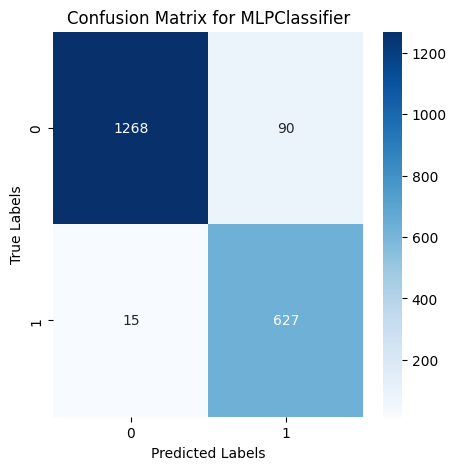

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for MLPClassifier')
plt.show()

In [ ]:
nn_model.score(x_test,y_test)

0.9475

In [ ]:
cv_scores = cross_val_score(nn_model, x_train, y_train, cv=5)

print("Cross-validation scores:", cv_scores)

mean_cv_score = np.mean(cv_scores)
print("Mean cross-validation score:", mean_cv_score)

##Logistic Regression

In [ ]:
logModel = LogisticRegression()

In [ ]:
param_grid = [
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

In [ ]:
clf = GridSearchCV(logModel, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)
clf_res =clf.fit(x_train, y_train)
y_predlog = clf_res.predict(x_test)

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
3120 fits failed out of a total of 4800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/skl

***Apply the best hyperparameter***

In [ ]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(C=1.0, solver='lbfgs')
y_predlog = lr_model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
y_predlog = y_predlog.predict(x_test)
y_predlog

array([1, 0, 0, ..., 1, 0, 1])

In [ ]:
conf_matrix = confusion_matrix(y_test, y_predlog)

conf_matrix

array([[1118,  240],
       [  27,  615]])

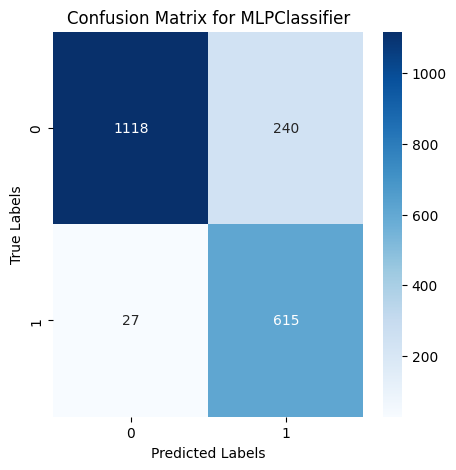

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for MLPClassifier')
plt.show()

In [ ]:
lr_model.score(x_test,y_test)

0.8665

In [ ]:
cv_scores = cross_val_score(lr_model, x_train, y_train, cv=5)

print("Cross-validation scores:", cv_scores)

mean_cv_score = np.mean(cv_scores)
print("Mean cross-validation score:", mean_cv_score)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Cross-validation scores: [0.86     0.85125  0.850625 0.851875 0.851875]
Mean cross-validation score: 0.853125


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


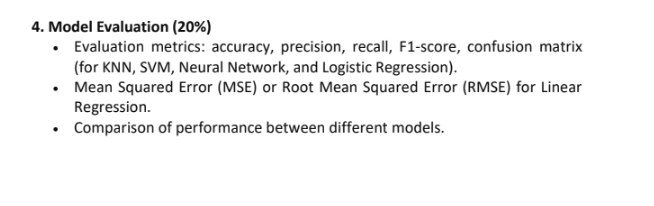

#**Evaluation Metrics**

In [ ]:
import seaborn as sns
def resultsSummarizer(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='macro')
    rec = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')
    sensitivity = recall_score(y_true,y_pred,average='macro')
    conf_matrix = confusion_matrix(y_true, y_pred)
    print(f'Accuracy Score: ' + '{:.4%}'.format(acc))
    print(f'Precision Score: ' + '{:.4%}'.format(prec))
    print(f'Recall Score: ' + '{:.4%}'.format(rec))
    print(f'F_1 Score: ' + '{:.4%}'.format(f1))
    print(f'Confusion Matrix: ',conf_matrix)
    sns.heatmap(conf_matrix, annot=True, fmt='d')
    plt.show()

## Linear Regression

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def regressionResults(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print("Mean Squared Error (MSE): {:.4f}".format(mse))
    print("Mean Absolute Error (MAE): {:.4f}".format(mae))
    print("R-squared (R2): {:.4f}".format(r2))


In [ ]:
regressionResults(y_test, y_pred_lr)

Mean Squared Error (MSE): 0.1587
Mean Absolute Error (MAE): 0.3536
R-squared (R2): 0.2717


##K-nearest Neighbor (KNN)

Accuracy Score: 94.4000%
Precision Score: 92.9624%
Recall Score: 94.6033%
F_1 Score: 93.7016%
Confusion Matrix:  [[1277   81]
 [  31  611]]


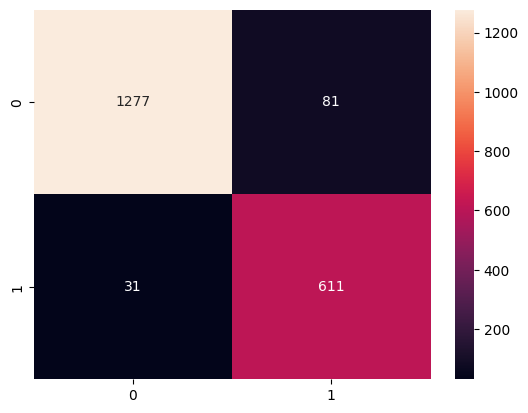

In [ ]:
resultsSummarizer(y_test, y_pred_knn)

## SVM

Accuracy Score: 90.0500%
Precision Score: 88.1688%
Recall Score: 92.6730%
F_1 Score: 89.3375%
Confusion Matrix:  [[1159  199]
 [   0  642]]


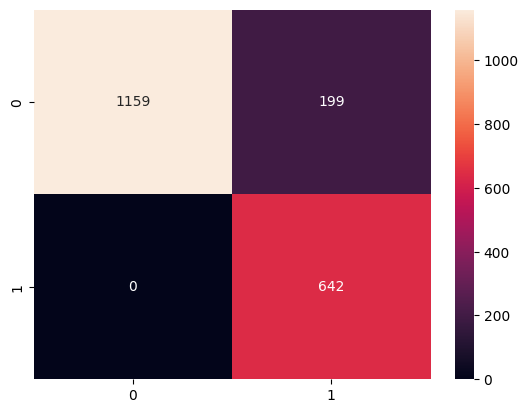

In [ ]:
from sklearn.metrics import classification_report
resultsSummarizer(y_test, y_pred_SVM)

## Neural Networks

Accuracy Score: 94.7500%
Precision Score: 93.1393%
Recall Score: 95.5181%
F_1 Score: 94.1490%
Confusion Matrix:  [[1268   90]
 [  15  627]]


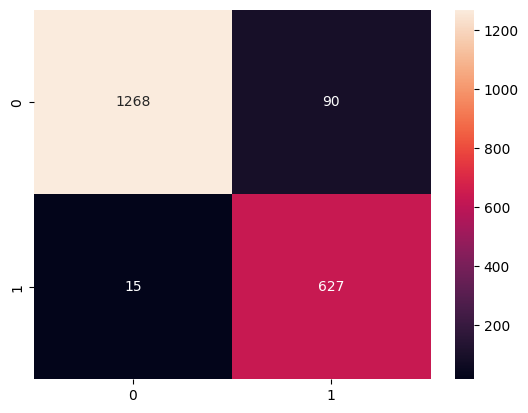

In [ ]:
from sklearn.metrics import classification_report
resultsSummarizer(y_test, y_pred_NN)

## Logistic Regression

Accuracy Score: 86.6500%
Precision Score: 84.7859%
Recall Score: 89.0607%
F_1 Score: 85.7486%
Confusion Matrix:  [[1118  240]
 [  27  615]]


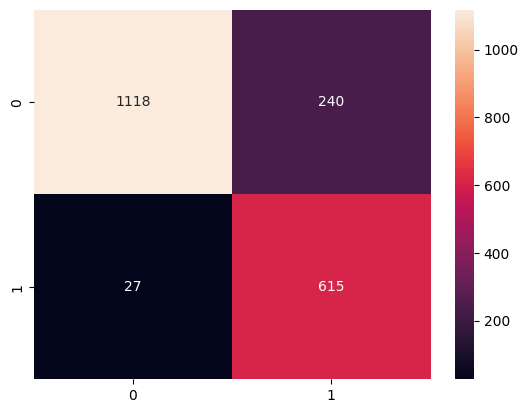

In [ ]:
from sklearn.metrics import classification_report
resultsSummarizer(y_test, y_predlog)

# **Compare the results between each model**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

models = {
    'KNN':KNeighborsClassifier(n_neighbors = 11, weights = 'distance',metric = 'manhattan'),
    'SVM': SVC(kernel='rbf',degree=3),
    'Neural Network': MLPClassifier(hidden_layer_sizes=(100,50), activation='relu', max_iter=1000),
    'Logistic Regression': LogisticRegression(C=1.0, solver='lbfgs'),
    'Linear Regression': LinearRegression(fit_intercept=True)
}

results = {}
for name, model in models.items():
    model.fit(x_train, y_train)

    y_pred = model.predict(x_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    results[name] = {'MSE': mse, 'RMSE': rmse}

for name, metrics in results.items():
    print(f'{name}: MSE = {metrics["MSE"]}, RMSE = {metrics["RMSE"]}')

best_model_name = min(results, key=lambda x: results[x]['MSE'])  #
print(f'\nBest Model: {best_model_name}')


KNN: MSE = 0.056, RMSE = 0.23664319132398465
SVM: MSE = 0.0995, RMSE = 0.3154362059117501
Neural Network: MSE = 0.0545, RMSE = 0.23345235059857505
Logistic Regression: MSE = 0.1335, RMSE = 0.3653765181289022
Linear Regression: MSE = 0.1587361793128796, RMSE = 0.3984170921445007

Best Model: Neural Network


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Comparison of Preformance between each model

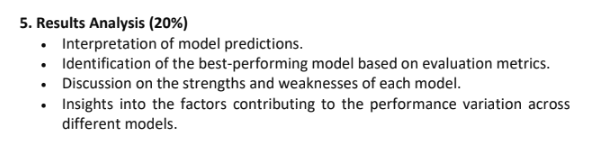



*   List item



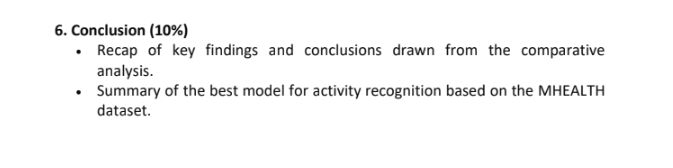